# Notebook Description

This Jupyter notebook demonstrates how to download, display and chart ONE time series using the Monitor+ python library.  The report downloads one market data time series as a monthly average. The data is requested as business days only (5 day week), filled forward using interpolation.  The time series data is then added to a Pandas data frame and a chart is displayed showing the time series and two moving averages. 

The datasource, symbol, frequency, moving average values and all paramerters can be changed in the 'Global Variables'section below.  The Chart library is Matplotlib and we use Pandas for the data frame. See the 'Imports' section below for a list of the libraries used.





<b>Disclaimer.</b><br>
We offer these reports for informational purposes only and are provided ‘as is’ without warranty of any kind, either express or implied, including, but not limited to, the implied warranties of fitness for a purpose, or the warranty of non-infringement.  Please refer to our <a href="https://www.sarus.com/terms-and-conditions">Terms and Conditions</a> for more information. Any links on this site are provided as a convenience and for informational purposes only; they do not constitute an endorsement or an approval by the us of any of the products, services or opinions of the corporation or organization or individual. We bear no responsibility for the accuracy, legality or content of the external site or for that of subsequent links. Contact any external sites for answers to questions regarding its content.  The market data used in the reports below may be generated sample data and as such not representative on any real or published values. Do not use any of the report values for any purpose other than to demonstrate the functionality of the  Monitor+ service.

<b>Notice:</b> The API key  used in this report is for demonstration purposes only and may return <em>simulated market data</em> (not actual market data data) or return a limited selection or range of market data.<br>
Do not use any data returned with this demonstration API key except to test the functionality of the Monitor+ API in a testing environment. Subscribers should replace the default API key (in the 'Global Variables' section) with their own API key in order to get valid market data.

If you have any questions about this report, please go to the Sarus web site www.sarus.com  and use the <a href="https://www.sarus.com/contact-us"> 'Contact'</a> menu to get in  touch or email us at support@sarus.com


## Imports

In [14]:
#  IData is the Monitor+ API class
from monitorplus import IData 
import pandas as pd
import matplotlib.pyplot as plt


## Global Variables

In [15]:
# Customers API Key needed to request for data from the Monitor+ API
# To get updated values, change this API key to your own key.
# The key below may retuen test data only and not actual market values.  
API_KEY = "PD3MV-7KO96-HEZSL-4U8JX"

# define colours used (see  https://i.stack.imgur.com/9UVnC.png)
BOLD = '\033[01m'
RESET = '\033[0m'
BLACK_FG = '\033[30m'
GREEN_FG = '\033[32m'
WHITE_FG = '\033[37m'

RED_BG = '\033[101m'
#  hmmm  '\033[47m' and '\033[107m' not working
WHITE_BG = ''

# ANSI code Combinations used in labels
WARNING_LABEL =  WHITE_FG + RED_BG
SUCCESS_LABEL=  GREEN_FG + WHITE_BG
NORMAL_LABEL =BLACK_FG + WHITE_BG



#  number of rows to list in the  table output
Data_Rows=30

#  The full API documentation for the API call used is at:   
#       https://dev2.idatamedia.org/api-docs#getdatasetvaluesrc

# Sample Dataset to use in the Notebook
API_Datasource1 = "ECBFX"
API_DSSymbol1 = "EURJPY"
# the Name below  will be filled from the API if the request is successful
API_DSName1 = ""


# The earliest date to request from the API
API_StartDate = "2023-01-01"


# Weekends can be added or removed by setting the value to "7"  or "5"
# "5" means only weekdays (no weekends) are returned. 
# Refer to th API documentation for many more options
API_WeekType = "5"

# The 2 moving  average values to  use
MovAvg1=7
MovAvg2=14


#  Fill the daily data before (prefill happens before calculating monthly averages)
API_Prefill=True

# API_PrefillType can be "previous",  "midpoint" or "interpolate"
API_PrefillType = "interpolate"


# We can choose to load and chart non-daily data. 
# Valid Frequencies are: 
#  w, hm, m, q, hy  y  ( where'hm' is half-month and 'hy' is half-year).
# Check the API documentation "Frequency Parameter" and "Frequency Options" sections for examples of custom frequencies and weekend handling.
#      https://www.sarus.com/api-docs#getdatasetvaluesrc
# Used in API to request daily or average data
DataFreq = "m"
# Frequency name - appears in chart legends
DataFreqDesc = "Monthly"

     
print ( SUCCESS_LABEL+ " The "+DataFreqDesc+" API command was parameters are set. \n")




 The Monthly API command was parameters are set. 



## API - Return market data  for one dataset

The full list of the parameters used in the API request to get market data can be <a href="https://www.sarus.com/api-docs#getdatasetvaluesrc">viewed here</a>


In [16]:
# initialise the Python class
idata = IData()
# turn off comments from  Monitor+
idata.set_verbose(False)

RC_DayResult =  None

#Store the API Key in the Python Class
idata.set_api_key(API_KEY)

# We will return the metadata from the user favorite datasets
# Now request historical prices for two datasets in RC ( row x column) format.
# If you see error messages below like "[WARNING] Error 401: Invalid credentials. Check your API key",  your API key in the 'Global Settings' section may be invalid
RC_DayResult = idata.get_dataset_values_rc(
    Series=[
        # You can change the datasources and symbols in the Global Variable section above
        # For HandleWeekend parameters - see HandleWeekends section at the  "Viewed Here"  link above. 5a = 5 day adjusted.
        {"Datasource": API_Datasource1,"Symbol": API_DSSymbol1, "HandleWeekends":API_WeekType,"Fill":API_Prefill }
    ],
    # Additional API parameters
    StartDate = API_StartDate,
    Frequency = DataFreq,
    Prefill = API_Prefill,
    # For missing valuess are filled
    FillOptions = {"Type": API_PrefillType},
     )
    
if (RC_DayResult is None):
       print (WARNING_LABEL +'\n The RC_Result API call returned an error. \n' + RESET)
else:
    print ( SUCCESS_LABEL+ " The "+DataFreqDesc+" API command was run successfully. \n"+RESET)



 The Monthly API command was run successfully. 



# Display the Market Data in a table.

In [17]:
#Access the Display function that helps us to display the report data.
from IPython.display import display

API_DSName1Day = ""

# Check we have data from the 'API Initialisation' section above using its RC_Result variable
if (RC_DayResult is None):
    print (WARNING_LABEL +'\nThe  API request for market data failed. Please check the "API Initialisation" section above.' + RESET)   
else:
    # Extract the names for the datasets.  We can use them later to check if the extract was successful.
    API_DSName1Day = RC_DayResult["Columns"][0]['Name']
    
    #  Check datasets are loaded OK
    if API_DSName1Day > "":
        columns=pd.DataFrame(RC_DayResult['Columns']).Bate
        df=pd.DataFrame(RC_DayResult['Rows']).transpose()
        df=df.rename(columns,axis=1)
        # show the latest elements in a table - rows defined in global Data_Rows variable
        print(SUCCESS_LABEL +"\nThe latest "+str(Data_Rows)+" daily data rows:\n"+RESET)
  
        display(df.tail(Data_Rows))
        
        # The methods we use require our data to be a Time-Series. 
    else:
        print(WARNING_LABEL + '\n No valid dataset was returned from the Monitor+ API. ' + RESET)

        
       


The latest 30 daily data rows:



,Close
2019-07-31,121.405652
2019-08-30,118.179091
2019-09-30,118.241905
2019-10-31,119.511304
2019-11-29,120.337619
2019-12-31,121.262415
2020-01-31,121.388830
2020-02-28,120.025500
2020-03-31,118.897273
2020-04-30,117.065616


# Creating the Moving Average Charts.

Plotting the API datasets in three charts.

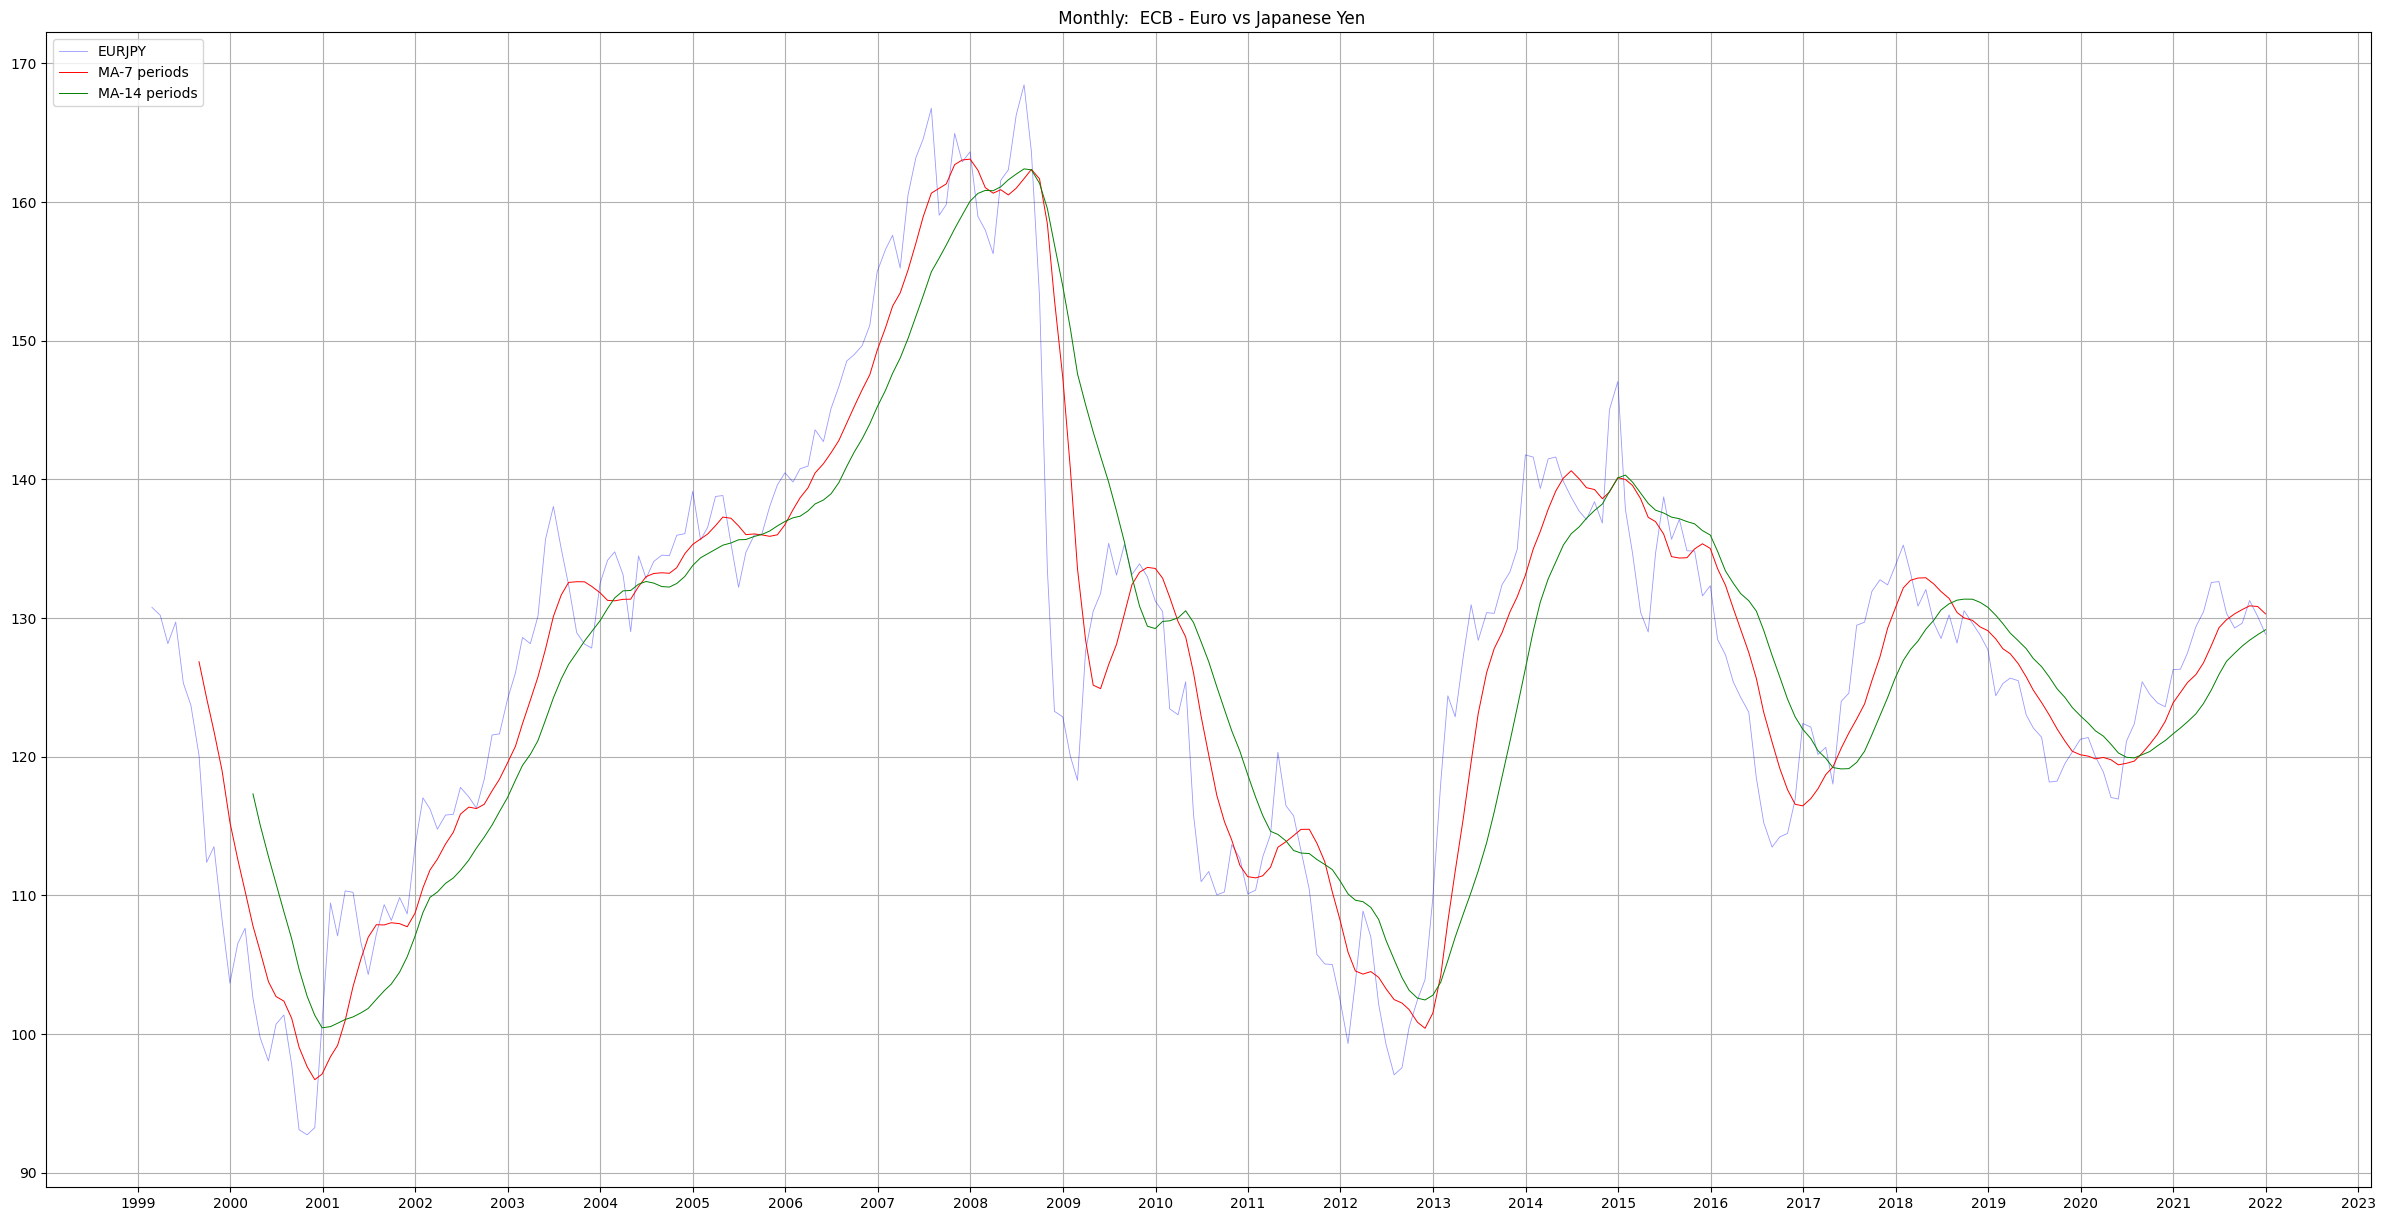

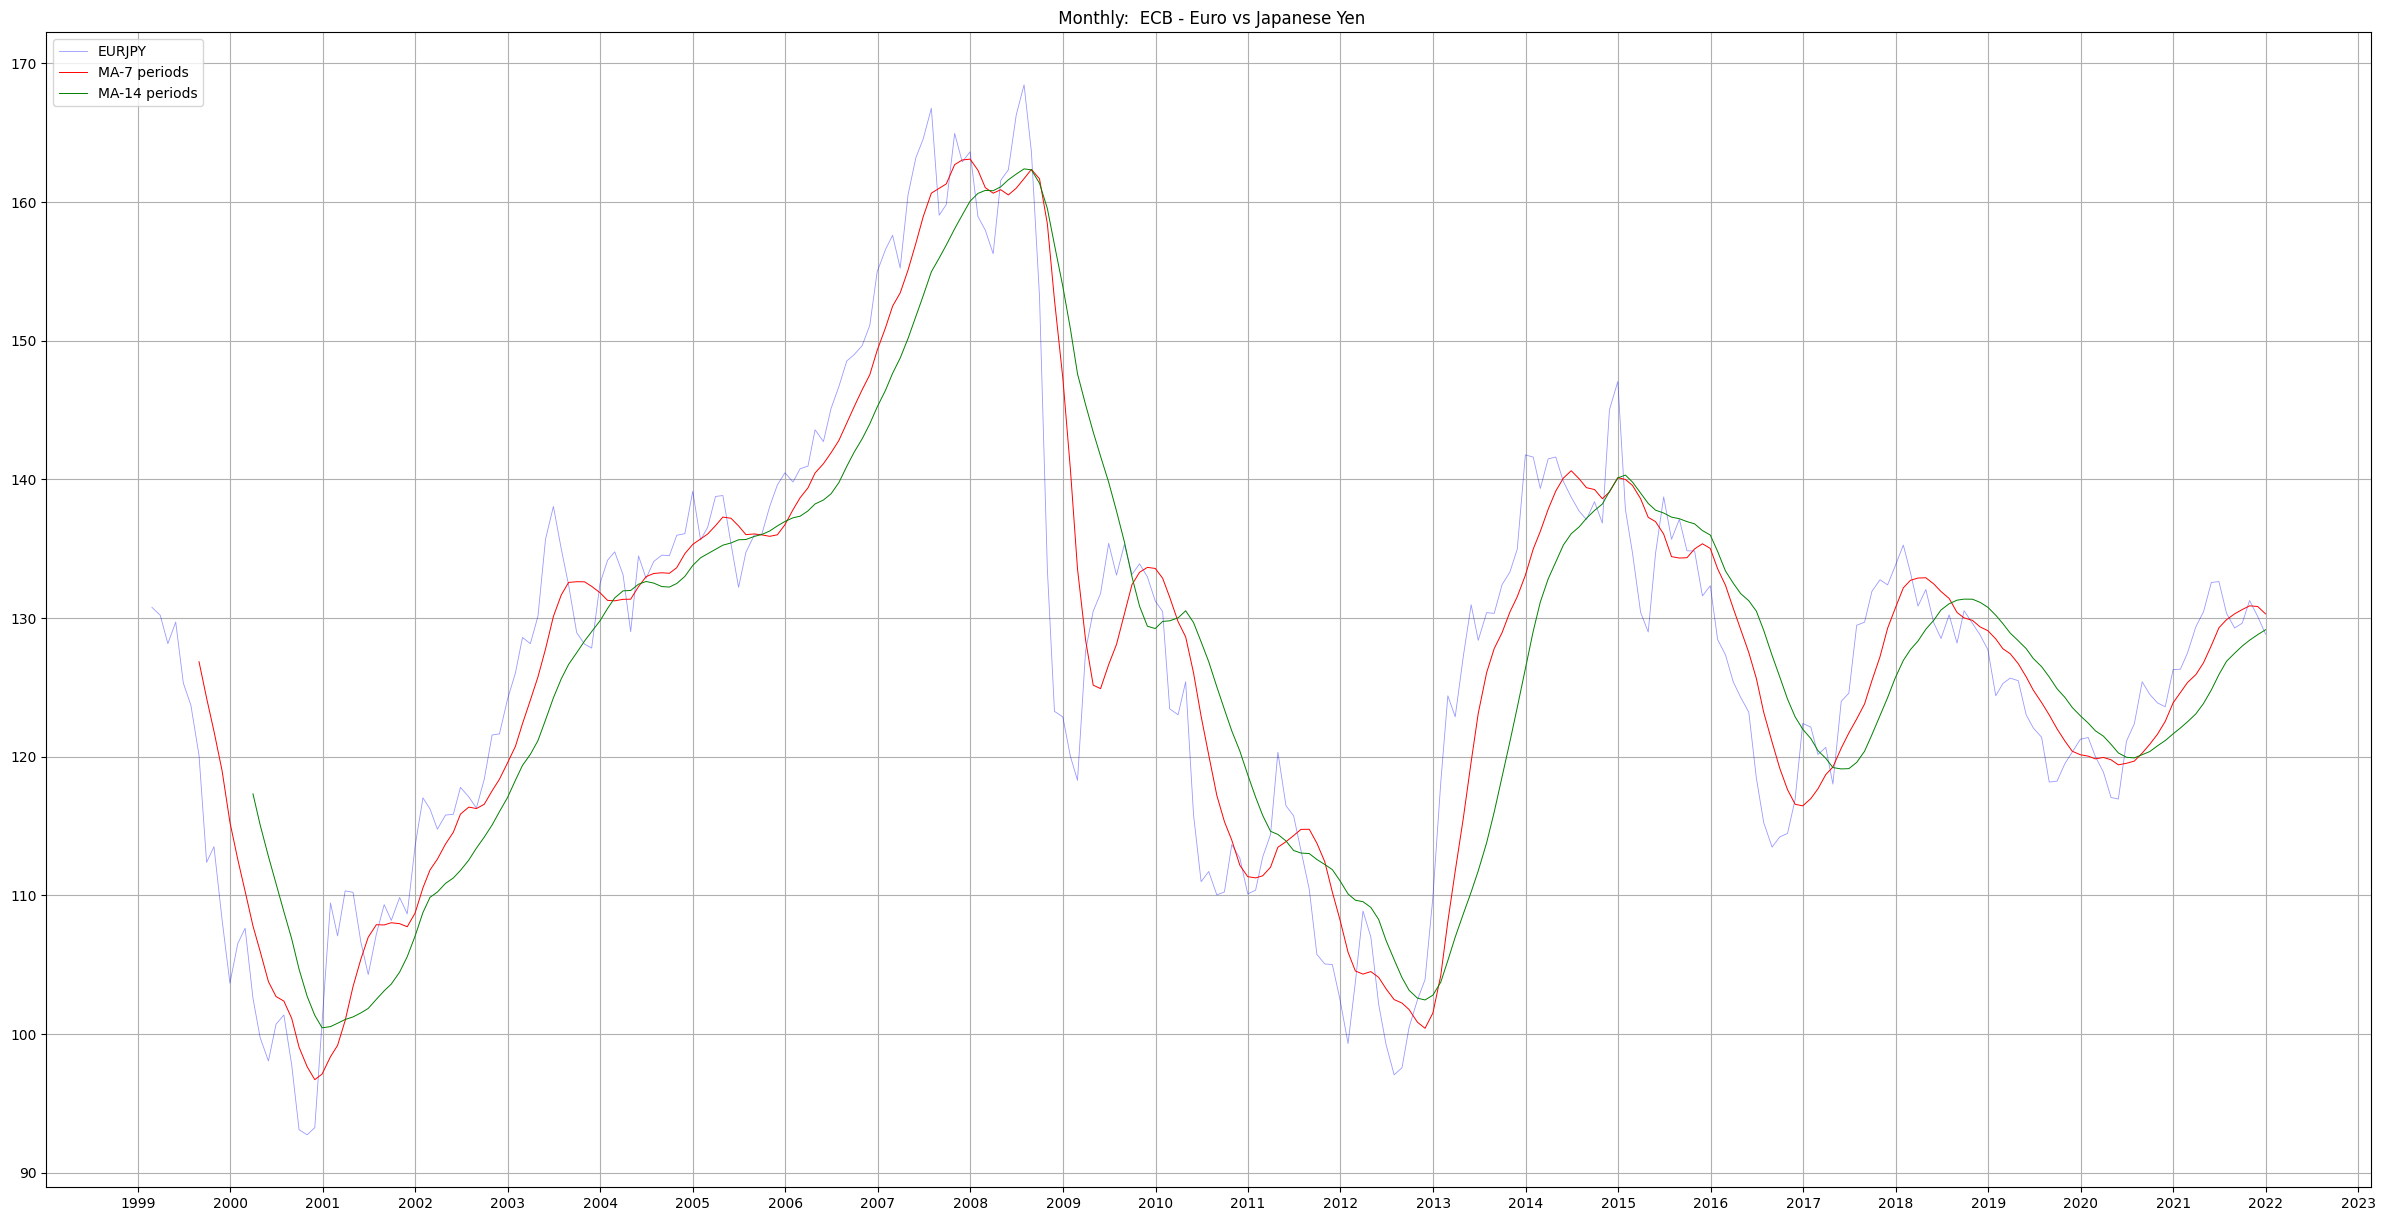

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is the column containing the date information in your DataFrame
df['Date'] = pd.to_datetime(df.index)

AvgKeyLbl1 = 'MA-'+str(MovAvg1)+' periods'
AvgKeyLbl2 = 'MA-'+str(MovAvg2)+' periods'

# Check if a dataset is loaded in case this code is run out of sequence
if API_DSName1Day > "":
    df['SMA_1'] = df['Close'].rolling(window=MovAvg1).mean()
    df['SMA_2'] = df['Close'].rolling(window=MovAvg2).mean()

    # Set up date formatting for years
    years_fmt = mdates.DateFormatter('%Y')
    
    # Plotting the chart
    f, (ax1) = plt.subplots(1, 1, figsize=[30, 15])
    ax1.plot(df['Date'], df["Close"], color='blue', linewidth=.6, label=API_DSSymbol1, alpha=0.4)
    ax1.plot(df['Date'], df['SMA_1'], label=AvgKeyLbl1, linewidth=.7, color='red')
    ax1.plot(df['Date'], df['SMA_2'], label=AvgKeyLbl2, linewidth=.7, color='green')
    ax1.title.set_text(f" {DataFreqDesc}:  {API_DSName1Day}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(years_fmt)
    plt.show()


   # Plotting the chart
    f, (ax1) = plt.subplots(1, 1, figsize=[30, 15])
    ax1.plot(df['Date'], df["Close"], color='blue', linewidth=.6, label=API_DSSymbol1, alpha=0.4)
    ax1.plot(df['Date'], df['SMA_1'], label=AvgKeyLbl1, linewidth=.7, color='red')
    ax1.plot(df['Date'], df['SMA_2'], label=AvgKeyLbl2, linewidth=.7, color='green')
    ax1.title.set_text(f" {DataFreqDesc}:  {API_DSName1Day}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    ax1.xaxis.set_major_locator(mdates.YearLocator())
    ax1.xaxis.set_major_formatter(years_fmt)
    plt.show()

else:
    ErrStr =  '\n\n '+DataFreqDesc + ' Chart: No valid dataset was loaded from the API. '
    print(WARNING_LABEL + ErrStr + RESET)